In [1]:
import osmnx as ox
import pandas as pd
import pvlib 
from datetime import datetime, date, time, timedelta 

In [2]:
superf = {'surface_tilt': 30,'surface_azimuth': 180} #Inclinación y acimut de la superficie inclinada
coord_origen = (40.405551, -3.700684 ) #ETSIDI
coord_destino = (40.419120, -3.693025 )#Cibeles
timezone = 'Etc/GMT+2'
altitude=667
hora_salida = datetime(2020, 7, 28, 14, 30, 0) #y, m, d, h, min, s 

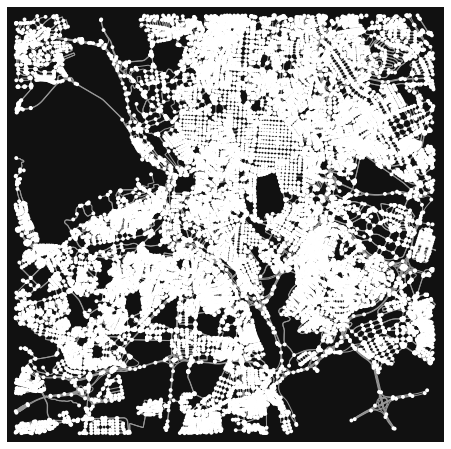

In [3]:
mapa_nodos = ox.graph_from_point (coord_origen, dist=7000, dist_type ='bbox' , network_type = 'drive')
fig, ax = ox.plot_graph(mapa_nodos) 
ox.speed.add_edge_speeds(mapa_nodos , hwy_speeds = 30 , fallback = 30 , precision = 0 )
ox.speed.add_edge_travel_times( mapa_nodos , precision = 0 )

In [4]:
# #GRAFICAR A GEODATAFRAME
nodos, caminos = ox.graph_to_gdfs(mapa_nodos) #Función de OSMnx que convierte el multidigraph en geodataframes de NODOS y LÍNEAS
# pd.set_option("max_columns", None) #Showing only two columns
# pd.set_option("max_rows", None)

In [5]:
#------------------SECCIÓN INFORMATIVA-----------------------------#
nodos.head() #GeoDataFrames de los nodos
caminos.head()

osmid  oneway lanes                  name  \
u      v          key                                                  
171946 26513145   0    807334397    True     4    Calle de Velázquez   
171951 1209331009 0    104864843    True   NaN    Calle Juan de Mena   
       26486636   0    553113575    True     3  Calle de Alfonso XII   
171952 26486617   0    317302445    True     3  Calle de Alfonso XII   
171953 2681222064 0     28401583    True   NaN        Calle Espalter   

                           highway maxspeed  length  speed_kph  travel_time  \
u      v          key                                                         
171946 26513145   0       tertiary       50  41.093       50.0          3.0   
171951 1209331009 0    residential      NaN  18.733       45.0          1.0   
       26486636   0       tertiary       50  81.552       50.0          6.0   
171952 26486617   0       tertiary      NaN  26.251       47.0          2.0   
171953 2681222064 0    residential      NaN  18.835       45.0          2.0   

                                                                geometry  \
u      v          key                                                      
171946 26513145   0    LINESTRING (-3.68445 40.42126, -3.68442 40.42163)   
171951 1209331009 0    LINESTRING (-3.68899 40.41736, -3.68885 40.41749)   
       26486636   0    LINESTRING (-3.68899 40.41736, -3.68903 40.416...   
171952 26486617   0    LINESTRING (-3.68898 40.41499, -3.68897 40.41475)   
171953 2681222064 0    LINESTRING (-3.68890 40.41277, -3.68876 40.41290)   

                      access  ref bridge tunnel junction width est_width  \
u      v          key                                                      
171946 26513145   0      NaN  NaN    NaN    NaN      NaN   NaN       NaN   
171951 1209331009 0      NaN  NaN    NaN    NaN      NaN   NaN       NaN   
       26486636   0      NaN  NaN    NaN    NaN      NaN   NaN       NaN   
171952 26486617   0      NaN  NaN    NaN    NaN      NaN   NaN       NaN   
171953 2681222064 0      NaN  NaN    NaN    NaN      NaN   NaN       NaN   

                      landuse  
u      v          key          
171946 26513145   0       NaN  
171951 1209331009 0       NaN  
       26486636   0       NaN  
171952 26486617   0       NaN  
171953 2681222064 0       NaN

In [6]:
#---------------------NODOS ORIGEN Y DESTINO SEGÚN COORDENADAS----------------------------------#
nodo_origen = ox.get_nearest_node(mapa_nodos, coord_origen, method='haversine', return_dist=False)
nodo_destino = ox.get_nearest_node(mapa_nodos, coord_destino, method='haversine', return_dist=False)
nodo_origen,nodo_destino

(26494692, 1074577474)

In [7]:
#--------------------------NODOS DE LA RUTA---------------------------------------#
ruta = ox.shortest_path(G=mapa_nodos, orig=nodo_origen, dest=nodo_destino, weight='length')
print(ruta) #Obtenemos la lista de nodos que se encuentran en el camino más corto.
len(ruta)

[26494692, 26494693, 26494655, 26494649, 26493405, 26493412, 26493399, 26493400, 614955801, 26494637, 26494638, 26494639, 26487803, 26487802, 26487800, 26487804, 26487791, 26487788, 26487785, 26487775, 26487773, 26487772, 26487771, 26487769, 3208415477, 1209330191, 1209332241, 317743431, 1209330270, 325076854, 325076749, 1074577474]


32

In [8]:
#--------------------------INFORMACIÓN CALLES DE LA RUTA ---------------------------------------#
lista_caminos =[]
for x in range(1,len(ruta)):
    lista_caminos.append(mapa_nodos[ruta[x-1]][ruta[x]])
len(lista_caminos)

31

In [9]:
#--------------------------NOMBRE DE LAS CALLES---------------------------------------#
nombre_calles =[]
for x in range(0,len(lista_caminos)):
    nombre_calles.append(lista_caminos[x][0]['name'])
len(nombre_calles)

31

In [10]:
#--------------------------NODOS INICIALES DE LAS CALLES---------------------------------------#
nodo1_calle =[]
for x in range(0,len(ruta)-1):
    nodo1_calle.append(ruta[x])
len(nodo1_calle)

31

In [11]:
#--------------------------NODOS FINALES DE LAS CALLES---------------------------------------#
nodo2_calle =[]
for x in range(1,len(ruta)):
    nodo2_calle.append(ruta[x])
len(nodo2_calle)

31

In [12]:
#--------------------------COORDENADAS TOTALES EN UNA LISTA---------------------------------------#
lista_coords_nodos =[]
for x in range(0,len(ruta)):
    lista_coords_nodos.append(mapa_nodos.nodes[ruta[x]]['y'])
    lista_coords_nodos.append(mapa_nodos.nodes[ruta[x]]['x'])
len(lista_coords_nodos)

64

In [13]:
#--------------------------COORDENADAS FINALES DE LA RUTA---------------------------------------#
coords_nodos = []
for i in range(0, len(lista_coords_nodos), 2):
    coords_nodos.append(lista_coords_nodos[i:i+2])
len(coords_nodos)

32

In [14]:
#--------------------------COORDENADAS INICIALES DE LAS CALLES---------------------------------------#
coords1_calle =[]
for x in range(0,len(ruta)-1): #Elimino la ultima coordenada para tener longitud 30
    coords1_calle.append(coords_nodos[x])
len(coords1_calle) 

31

In [15]:
#-------------------------COORDENADAS FINALES DE LAS CALLES--------------------------------------#
coords2_calle =[]
for x in range(1,len(ruta)):
    coords2_calle.append(coords_nodos[x])
len(coords2_calle)

31

<Figure size 432x288 with 0 Axes>

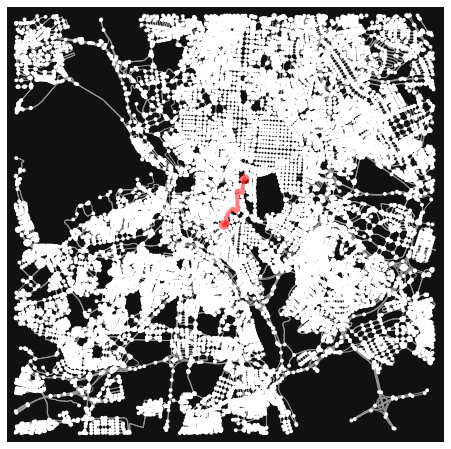

In [16]:
#----------------------------TRAZADO DE LA RUTA-------------------------------------------#
caminos.plot(ax=ax, linewidth=1, edgecolor='dimgray') #Líneas
fig2, ax = ox.plot_graph_route(mapa_nodos, ruta)

In [17]:
#-------------------------INFORMACIÓN POR NODO DE LA RUTA----------------------------------------#
ruta_info=ox.utils_graph.get_route_edge_attributes(mapa_nodos, ruta, attribute=None, minimize_key='length', retrieve_default=None)
ruta_info

[{'osmid': 4350218,
  'oneway': True,
  'lanes': '2',
  'name': 'Ronda de Valencia',
  'highway': 'primary',
  'maxspeed': '50',
  'length': 142.701,
  'geometry': <shapely.geometry.linestring.LineString at 0x1b6618292b0>,
  'speed_kph': 50.0,
  'travel_time': 10.0},
 {'osmid': 16560347,
  'oneway': True,
  'lanes': '1',
  'name': 'Calle Fray Luis de León',
  'highway': 'residential',
  'maxspeed': '30',
  'length': 8.085,
  'speed_kph': 30.0,
  'travel_time': 1.0},
 {'osmid': 7972743,
  'oneway': True,
  'lanes': '1',
  'name': 'Calle de Valencia',
  'highway': 'residential',
  'length': 112.324,
  'geometry': <shapely.geometry.linestring.LineString at 0x1b661816be0>,
  'speed_kph': 45.0,
  'travel_time': 9.0},
 {'osmid': 7972743,
  'oneway': True,
  'lanes': '1',
  'name': 'Calle de Valencia',
  'highway': 'residential',
  'length': 63.571,
  'geometry': <shapely.geometry.linestring.LineString at 0x1b661816a00>,
  'speed_kph': 45.0,
  'travel_time': 5.0},
 {'osmid': 7972742,
  'onewa

In [18]:
#----------------------------APROXIMACIÓN DE LOS SEGUNDOS-------------------------------------------#
time_aprox=[]
for x in range(0,len(ruta_info)):
    time_aprox.append(round(ruta_info[x]['travel_time']))
time_aprox

[10,
 1,
 9,
 5,
 1,
 8,
 6,
 1,
 16,
 2,
 7,
 3,
 6,
 4,
 3,
 13,
 7,
 4,
 14,
 4,
 10,
 1,
 11,
 12,
 10,
 3,
 1,
 3,
 3,
 10,
 18]

In [19]:
#----------------------------VELOCIDAD POR CALLE EN KPH-------------------------------------------#
calles_speed =[]
for x in range(0,len(ruta_info)):
    calles_speed.append(ruta_info[x]['speed_kph'])
len(calles_speed)

31

In [20]:
#---------HORA DE PASADA POR NODO-----------#
horas_intermedias = hora_salida
hora_llegada=hora_salida
horas_trayecto = []
for x in range(0,len(ruta_info)):
   horas_trayecto.append(horas_intermedias + timedelta(seconds=time_aprox[x]))
   horas_intermedias += timedelta(seconds=time_aprox[x])
horas_trayecto
for x in range(0,len(ruta_info)):
    hora_llegada+=timedelta(seconds=time_aprox[x])

In [21]:
naive_times = pd.date_range(start=hora_salida, end=hora_llegada, freq='1S')
times = naive_times.tz_localize(timezone)
solar_pos = pvlib.solarposition.get_solarposition(times, coord_origen[0], coord_origen[1])

In [22]:
# aoi = pvlib.irradiance.aoi(superf['surface_tilt'], superf['surface_azimuth'],
#                                solar_pos['apparent_zenith'], solar_pos['azimuth'])

In [23]:
dni_extra = pvlib.irradiance.get_extra_radiation(times)
airmass_rel = pvlib.atmosphere.get_relative_airmass(solar_pos['apparent_zenith'])
pressure = pvlib.atmosphere.alt2pres(altitude)
airmass_abs = pvlib.atmosphere.get_absolute_airmass(airmass_rel, pressure)
turbidez = pvlib.clearsky.lookup_linke_turbidity(times, coord_origen[0], coord_origen[1])
val_sol = pvlib.clearsky.ineichen(solar_pos['apparent_zenith'], airmass_abs, turbidez,
                                 dni_extra=dni_extra, altitude=altitude)
dni_extra

2020-07-28 14:30:00-02:00    1324.195304
2020-07-28 14:30:01-02:00    1324.195304
2020-07-28 14:30:02-02:00    1324.195304
2020-07-28 14:30:03-02:00    1324.195304
2020-07-28 14:30:04-02:00    1324.195304
                                ...     
2020-07-28 14:33:22-02:00    1324.195304
2020-07-28 14:33:23-02:00    1324.195304
2020-07-28 14:33:24-02:00    1324.195304
2020-07-28 14:33:25-02:00    1324.195304
2020-07-28 14:33:26-02:00    1324.195304
Length: 207, dtype: float64

In [24]:
irrad=pvlib.irradiance.get_total_irradiance(superf['surface_tilt'],superf['surface_azimuth'], 
    solar_pos['zenith'] , solar_pos['azimuth'], val_sol['dni'], val_sol['ghi'] , 
    val_sol['dhi'], dni_extra=dni_extra, airmass=airmass_abs, albedo=0.10,
    surface_type=None, model='isotropic', model_perez='allsitescomposite1990')
irrad

,poa_global,poa_direct,poa_diffuse,poa_sky_diffuse,poa_ground_diffuse
2020-07-28 14:30:00-02:00,445.329222,348.347590,96.981632,93.726257,3.255375
2020-07-28 14:30:01-02:00,445.267776,348.291868,96.975908,93.720890,3.255018
2020-07-28 14:30:02-02:00,445.206329,348.236146,96.970183,93.715523,3.254661
2020-07-28 14:30:03-02:00,445.144881,348.180423,96.964458,93.710155,3.254303
2020-07-28 14:30:04-02:00,445.083429,348.124697,96.958732,93.704786,3.253946
...,...,...,...,...,...
2020-07-28 14:33:22-02:00,432.895804,337.080147,95.815656,92.632658,3.182999
2020-07-28 14:33:23-02:00,432.834151,337.024316,95.809836,92.627196,3.182639
2020-07-28 14:33:24-02:00,432.772495,336.968481,95.804014,92.621734,3.182280
2020-07-28 14:33:25-02:00,432.710841,336.912649,95.798192,92.616271,3.181920


In [25]:
filtro_irrad=[]
for x in range(0,len(ruta_info)):
  filtro_irrad.append(irrad.loc[horas_trayecto[x]])

C:\Users\alvar\anaconda3\envs\ox\lib\site-packages\pandas\core\indexing.py:1124: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version.  Use a timezone-aware object instead.
  return self._get_label(key, axis=axis)


In [26]:
poa_global_filtro=[] #Filtramos la parte de poa_global
for x in range(0,len(ruta)-1):
    poa_global_filtro.append(filtro_irrad[x]['poa_global'])
df_global=pd.DataFrame(poa_global_filtro)
poa_global_lista=df_global.iloc[:, 0] # Primera columna
poa_global=[] #Lista de datos para unir al datafram informativo
for x in range(0,len(ruta)-1): 
    poa_global.append(poa_global_lista[x])
print(poa_global)

[444.7147107737492, 444.65325389184034, 444.10008805439304, 443.7927385207789, 443.7312629017101, 443.23943648066086, 442.8705234609755, 442.8090317419497, 441.82505416713644, 441.7020385291062, 441.27144813785605, 441.08689470771606, 440.7177571334012, 440.47164373079727, 440.28704961643365, 439.48702921588705, 439.05617715673645, 438.8099548739266, 437.94804380603415, 437.7017460189132, 437.0859349340072, 437.0243485699265, 436.3468278823546, 435.607580774045, 434.99143067108923, 434.80656811180893, 434.74494531775053, 434.5600686297571, 434.3751857147713, 433.7588441612606, 432.64918537904896]


In [27]:
#----------------------------------------DATAFRAME-------------------------------------------#
df = pd.DataFrame(nombre_calles,columns=['Dirección'])
df['km/h'] = calles_speed
df['Tiempo'] = time_aprox
df['Nodo Origen'] = nodo1_calle
df['Origen'] = coords1_calle
df['NodDestino'] = nodo2_calle
df['Destino'] = coords2_calle
df['Ruta'] = horas_trayecto
df['poa'] = poa_global

In [28]:
print ('Fecha y hora de inicio de la ruta', hora_salida)
print('Fecha y hora de fin de la ruta', hora_llegada)
df.iloc[0:len(ruta)] # Primeras cinco filas
# pd.set_option("max_columns", None) #Showing only two columns
# pd.set_option("max_rows", None)

Fecha y hora de inicio de la ruta 2020-07-28 14:30:00
Fecha y hora de fin de la ruta 2020-07-28 14:33:26


,Dirección,km/h,Tiempo,Nodo Origen,Origen,NodDestino,Destino,Ruta,poa
0,Ronda de Valencia,50.0,10,26494692,"[40.4054358, -3.7009366]",26494693,"[40.4058793, -3.6993552]",2020-07-28 14:30:10,444.714711
1,Calle Fray Luis de León,30.0,1,26494693,"[40.4058793, -3.6993552]",26494655,"[40.4059471, -3.6993897]",2020-07-28 14:30:11,444.653254
2,Calle de Valencia,45.0,9,26494655,"[40.4059471, -3.6993897]",26494649,"[40.4068618, -3.6999526]",2020-07-28 14:30:20,444.100088
3,Calle de Valencia,45.0,5,26494649,"[40.4068618, -3.6999526]",26493405,"[40.4073784, -3.7002742]",2020-07-28 14:30:25,443.792739
4,Calle de la Sombrerería,30.0,1,26493405,"[40.4073784, -3.7002742]",26493412,"[40.4074185, -3.7001552]",2020-07-28 14:30:26,443.731263
5,Calle del Salitre,45.0,8,26493412,"[40.4074185, -3.7001552]",26493399,"[40.4082563, -3.6996757]",2020-07-28 14:30:34,443.239436
6,Calle del Salitre,45.0,6,26493399,"[40.4082563, -3.6996757]",26493400,"[40.4088871, -3.6992873]",2020-07-28 14:30:40,442.870523
7,Calle del Salitre,45.0,1,26493400,"[40.4088871, -3.6992873]",614955801,"[40.4089325, -3.6991944]",2020-07-28 14:30:41,442.809032
8,Calle del Salitre,45.0,16,614955801,"[40.4089325, -3.6991944]",26494637,"[40.4102787, -3.697538]",2020-07-28 14:30:57,441.825054
9,Calle de Santa Isabel,50.0,2,26494637,"[40.4102787, -3.697538]",26494638,"[40.4100796, -3.6972608]",2020-07-28 14:30:59,441.702039
